# Coastal Pioneer CTD Profilers (CTDPFK000) Data Quality Report

**Evaluation Date** **:** 6/22/2018

**Evaluators: ** Justine Whitaker, Yvonne Barkley

## **Review Summary**

This report focuses on CTD data from the wire-following profiler collected during the hurricane season. Five moorings had recovered data available from September 1-28, 2016, and by reviewing data from all five moorings, we can look for consistency across the mooring and identify patterns by comparing offshore and inshore moorings. 

Three wire following profiler CTDs had usable data, and two did not provide data likely due to biofouling that prevented movement along the wire.

Hurricane Hermine appears to have only interrupted data collection for a very short period of time. We did not focus on a shorter time period since the month-long evaluation did not reveal any extraordinary findings. 

Additional data from CP04OSPM-WFP01-03-CTDPFK000 was evaluated, but needs to be investigated further.




## **1. Selected instruments included in this report**

In this report, we plan to evaluate the wire following profiler CTD data (recovered) from 5 moorings on the Coastal Pioneer Array. Mooring key numbers correspond to the labels in the map.


Instrument | Mooring Key | Reference Designator | Method | Stream 
 -- | -- | -- | -- | --
CTD | 1 | [CP02PMUI-WFP01-03-CTDPFK000](http://ooi.visualocean.net/instruments/view/CP02PMUI-WFP01-03-CTDPFK000) | recovered | ctdpf_ckl_wfp_instrument_recovered
CTD | 3 | [CP02PMUO-WFP01-03-CTDPFK000](http://ooi.visualocean.net/instruments/view/CP02PMUO-WFP01-03-CTDPFK000) | recovered | ctdpf_ckl_wfp_instrument_recovered
CTD | 5 | [CP02PMCI-WFP01-03-CTDPFK000](http://ooi.visualocean.net/instruments/view/CP02PMCI-WFP01-03-CTDPFK000) | recovered | ctdpf_ckl_wfp_instrument_recovered
CTD | 6 | [CP02PMCO-WFP01-03-CTDPFK000](http://ooi.visualocean.net/instruments/view/CP02PMCO-WFP01-03-CTDPFK000) | recovered | ctdpf_ckl_wfp_instrument_recovered
CTD | 7 | [CP04OSPM-WFP01-03-CTDPFK000](http://ooi.visualocean.net/instruments/view/CP04OSPM-WFP01-03-CTDPFK000) | recovered | ctdpf_ckl_wfp_instrument_recovered

![alt text](http://oceanobservatories.org/wp-content/uploads/2015/09/CEV-OOI-Coastal-Pioneer-Array.jpg =1000x)

## 2. Time periods of interest
We will focus on the following time periods for evaluation:
* September 2016 - all deployments during that timeframe


## **3. Related Metadata**
In this section, we will review some of the metadata available in the system to make sure it is present and correct. Below is information on API requests.


The code listed below loads the data for the time period from each CTD on the wire-following profiler for five different moorings.

In [88]:
# Setup Instrument Variables for each mooring
sites = ['CP02PMUI', 'CP02PMUO', 'CP02PMCI', 'CP02PMCO', 'CP04OSPM'] # 5 Coastal Pioneer Moorings
node = 'WFP01' #We are using the wire-following profilers 
sensor = '03-CTDPFK000' # Evaluating the CTD
method = 'recovered_wfp' # Recovered data
stream = 'ctdpf_ckl_wfp_instrument_recovered' # CTD data 
# We are interested in September 2016, but one profiler is limited to Sept 28, 2016. This is the limit to our date range.
beginDT = '2016-09-01T01:01:01.900Z' 
endDT = '2016-09-28T01:01:01.900Z'


In [125]:
#API
USERNAME = ''
TOKEN =  ''
DATA_API = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv'
VOCAB_API = 'https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv'
ASSET_API = 'https://ooinet.oceanobservatories.org/api/m2m/12587'

In [2]:
# Setup the Python processing environment 
import requests
import datetime
import pandas as pd
import re
import os

In [4]:
# Specify some functions to convert timestamps
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def ntp_seconds_to_datetime(ntp_seconds):
    return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)
  
def convert_time(ms):
  if ms != None:
    return datetime.datetime.utcfromtimestamp(ms/1000)
  else:
    return None

### 3a. Vocabulary Metadata
This section includes the basic vocabulary information (metadata) for each instrument.

In [5]:
# Setup the API request url CP02PMUI-WFP01-03-CTDPFK000
vocabData = []
dfVocab = pd.DataFrame() # Setup empty dataframe
#Create our data requests
for site in sites:
  # Setup the API request url
  data_request_url ='/'.join((VOCAB_API,site,node,sensor))
  print(data_request_url)

  # Grab the information from the server
  r = requests.get(data_request_url, auth=(USERNAME, TOKEN))
  vocabData = (r.json())
  for d in vocabData:
    dfVocab = dfVocab.append({
      'Site': d['tocL1'],
      'Node': d['tocL3'],
      'Instrument': d['instrument'],
      'Manufacturer': d['manufacturer'],
      'Model': d['model'],
      'Reference Designator': d['refdes'],
      'Depth Range (m)': str(d['mindepth']) + ' - ' +str(d['maxdepth']),
      }, ignore_index=True)
    

dfVocab = pd.DataFrame(dfVocab, columns = ['Instrument', 'Manufacturer','Model','Site', 'Reference Designator', 'Node', 'Depth Range (m)'])
dfVocab


https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv/CP02PMUI/WFP01/03-CTDPFK000
https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv/CP02PMUO/WFP01/03-CTDPFK000
https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv/CP02PMCI/WFP01/03-CTDPFK000
https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv/CP02PMCO/WFP01/03-CTDPFK000
https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv/CP04OSPM/WFP01/03-CTDPFK000


,Instrument,Manufacturer,Model,Site,Reference Designator,Node,Depth Range (m)
0,CTD,Sea-Bird,SBE 52MP,Coastal Pioneer,CP02PMUI-WFP01-03-CTDPFK000,Wire-Following Profiler,15.0 - 70.0
1,CTD,Sea-Bird,SBE 52MP,Coastal Pioneer,CP02PMUO-WFP01-03-CTDPFK000,Wire-Following Profiler,20.0 - 425.0
2,CTD,Sea-Bird,SBE 52MP,Coastal Pioneer,CP02PMCI-WFP01-03-CTDPFK000,Wire-Following Profiler,15.0 - 104.0
3,CTD,Sea-Bird,SBE 52MP,Coastal Pioneer,CP02PMCO-WFP01-03-CTDPFK000,Wire-Following Profiler,15.0 - 125.0
4,CTD,Sea-Bird,SBE 52MP,Coastal Pioneer,CP04OSPM-WFP01-03-CTDPFK000,Wire-Following Profiler,15.0 - 427.0


### 3b. Deployment Information
This section includes information about the deployments for this instrument. We will grab all of the deployments available in the system for September 2016 and then output the date ranges, latitude/longitude, asset ID, and sensor ID for each. 

In [6]:
# Setup the API request url
data_request_url = ASSET_API + '/events/deployment/query'
dfAsset = pd.DataFrame() # Setup empty array
#deployData = []
for site in sites:
  params = {
   'beginDT':beginDT,
   'endDT':endDT,
   'refdes':site+'-'+node+'-'+sensor,   
    }

  # Grab the information from the server
  r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
  assetData = r.json()

  for d in assetData:
    dfAsset = dfAsset.append({
      'deployment': d['deploymentNumber'],
      'start': convert_time(d['eventStartTime']),
      'stop': convert_time(d['eventStopTime']),
      'latitude': d['location']['latitude'],
      'longitude': d['location']['longitude'],
      'sensor': d['sensor']['uid'],
      'asset_id': d['sensor']['assetId'],
      }, ignore_index=True)
dfAsset

,asset_id,deployment,latitude,longitude,sensor,start,stop
0,1646.0,7.0,40.36533,-70.78090,CGINS-CTDPFK-00125,2016-05-21 16:52:00,2016-10-04 14:49:00
1,1644.0,7.0,39.94212,-70.78002,CGINS-CTDPFK-00127,2016-05-18 21:17:00,2016-10-01 16:16:00
2,1684.0,6.0,40.22691,-70.88940,CGINS-CTDPFK-00106,2016-07-01 17:53:00,2016-10-02 20:32:00
3,1645.0,6.0,40.10068,-70.88820,CGINS-CTDPFK-00128,2016-05-20 17:43:00,2016-10-02 11:59:00
4,1648.0,5.0,39.94325,-70.88667,CGINS-CTDPFK-00126,2016-05-19 22:35:00,2016-09-28 13:25:00


In [35]:
print data_request_url

https://ooinet.oceanobservatories.org/api/m2m/12587/events/deployment/query


### 3c. Deployment Annotations
This section will include any annotations for the CTD instrument during 2016. 

In [90]:
# Setup Instrument Variables
site = 'CP02PMUO'        
node = 'WFP01'
instrument = '03-CTDPFK000'
method = 'recovered_wfp'
stream = 'ctdpf_ckl_wfp_instrument_recovered'

In [91]:
ANNO_API = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'
params = {
  'beginDT':int(datetime.date(2016,9,1).strftime('%s'))*1000,
  'endDT':int(datetime.date(2016,9,28).strftime('%s'))*1000,
  'refdes':site+'-'+node+'-'+sensor,
}

r = requests.get(ANNO_API, params=params, auth=(USERNAME, TOKEN))
data = r.json()

df = pd.DataFrame() # Setup empty array
for d in data:
  df = df.append({
    'annotation': d['annotation'],
    'start': convert_time(d['beginDT']),
    'stop': convert_time(d['endDT']),
    'site': d['subsite'],
    'node': d['node'],
    'sensor': d['sensor'],
    'id': d['id']
  }, ignore_index=True)
pd.set_option('display.max_colwidth', -1) # Show the full annotation text
df

,annotation,id,node,sensor,site,start,stop
0,The Wire-Following Profiler is stuck at the top of its range. The problem is assumed to be related to fouling of the line.,44.0,WFP01,None,CP02PMUO,2016-09-06 09:13:22,2016-10-01 09:05:46


In [94]:
# Setup Instrument Variables
site = 'CP02PMCO'        
node = 'WFP01'
instrument = '03-CTDPFK000'
method = 'recovered_wfp'
stream = 'ctdpf_ckl_wfp_instrument_recovered'

In [95]:
ANNO_API = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'
params = {
  'beginDT':int(datetime.date(2016,9,1).strftime('%s'))*1000,
  'endDT':int(datetime.date(2016,9,28).strftime('%s'))*1000,
  'refdes':site+'-'+node+'-'+sensor,
}

r = requests.get(ANNO_API, params=params, auth=(USERNAME, TOKEN))
data = r.json()

df = pd.DataFrame() # Setup empty array
for d in data:
  df = df.append({
    'annotation': d['annotation'],
    'start': convert_time(d['beginDT']),
    'stop': convert_time(d['endDT']),
    'site': d['subsite'],
    'node': d['node'],
    'sensor': d['sensor'],
    'id': d['id']
  }, ignore_index=True)
pd.set_option('display.max_colwidth', -1) # Show the full annotation text
df

,annotation,id,node,sensor,site,start,stop
0,No telemetered data expected because communication were lost after the passge of tropical storm Hermine.,234.0,None,None,CP02PMCO,2016-09-05 09:05:48,2016-10-02 11:59:00


In [37]:
# Setup Instrument Variables #no annotations
site = 'CP02PMUI'        
node = 'WFP01'
instrument = '03-CTDPFK000'
method = 'recovered_wfp'
stream = 'ctdpf_ckl_wfp_instrument_recovered'

In [92]:
# Setup Instrument Variables #no annotations
site = 'CP02PMCI'        
node = 'WFP01'
instrument = '03-CTDPFK000'
method = 'recovered_wfp'
stream = 'ctdpf_ckl_wfp_instrument_recovered'

In [96]:
# Setup Instrument Variables #no annotations
site = 'CP04OSPM'        
node = 'WFP01'
instrument = '03-CTDPFK000'
method = 'recovered_wfp'
stream = 'ctdpf_ckl_wfp_instrument_recovered'

## 4. The full dataset
This section provides code to retrieve netcdf files for all 5 instruments during September, 2016.

In [87]:
# Setup Instrument Variables CP04OSPM-WFP01-03-CTDPFK000
params = {
  'beginDT': beginDT,
  'endDT': endDT,
  'format':'application/netcdf',
  'include_annotations':'true'
}

#This loop only needs to run once. Uncomment to run.
# dfURL = []

# for site in sites:
#   data_request_url ='/'.join((DATA_API,site,node,sensor,method,stream))
#   r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
#   data = r.json()
#   dfURL.append(data['allURLs'][0])
  
# print dfURL  #This has all the urls
  

In [83]:
dfURL = [u'https://opendap.oceanobservatories.org/thredds/catalog/ooi/justine.m.whitaker@gmail.com/20180620T193334-CP02PMUI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/catalog.html', u'https://opendap.oceanobservatories.org/thredds/catalog/ooi/justine.m.whitaker@gmail.com/20180620T193343-CP02PMUO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/catalog.html', u'https://opendap.oceanobservatories.org/thredds/catalog/ooi/justine.m.whitaker@gmail.com/20180620T193351-CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/catalog.html', u'https://opendap.oceanobservatories.org/thredds/catalog/ooi/justine.m.whitaker@gmail.com/20180620T193403-CP02PMCO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/catalog.html', u'https://opendap.oceanobservatories.org/thredds/catalog/ooi/justine.m.whitaker@gmail.com/20180620T193413-CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/catalog.html']
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'

for url in dfURL:
  dataset = requests.get(url).text
  urls = re.findall(r'href=[\'"]?([^\'" >]+)', dataset)
  x = re.findall(r'(ooi/.*?.nc)', dataset) #looking for all files that end in .nc, the netcdfs
  for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
  for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
    datasets = [os.path.join(tds_url, i) for i in x]
#     y = os.path.join(tds_url, i)
#     datasets.append(y)
  print datasets #this should give you all the netcdf files
 

[u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/justine.m.whitaker@gmail.com/20180620T193334-CP02PMUI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0007_CP02PMUI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20160901T013001-20160928T000720.979118.nc']
[u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/justine.m.whitaker@gmail.com/20180620T193343-CP02PMUO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0007_CP02PMUO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20160901T030002-20160928T001321.988636.nc']
[u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/justine.m.whitaker@gmail.com/20180620T193351-CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0006_CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20160901T013002-20160928T001205.987430.nc']
[u'https://opendap.oceanobservatories.org/thre

We saved all urls in a list.

In [95]:
datasets = [u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/justine.m.whitaker@gmail.com/20180620T193334-CP02PMUI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0007_CP02PMUI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20160901T013001-20160928T000720.979118.nc',
u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/justine.m.whitaker@gmail.com/20180620T193343-CP02PMUO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0007_CP02PMUO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20160901T030002-20160928T001321.988636.nc',
u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/justine.m.whitaker@gmail.com/20180620T193351-CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0006_CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20160901T013002-20160928T001205.987430.nc',
u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/justine.m.whitaker@gmail.com/20180620T193403-CP02PMCO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0006_CP02PMCO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20160901T013001-20160928T001010.985025.nc',
u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/justine.m.whitaker@gmail.com/20180620T193413-CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0005_CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20160901T030002-20160928T001307.988432.nc']

In [4]:
import matplotlib.pyplot as plt

!pip install netCDF4
import netCDF4 as nc

!pip install xarray
import xarray as xr

!pip install cmocean
import cmocean

!pip install numpy
import numpy

    100% |████████████████████████████████| 3.6MB 4.1MB/s 
    100% |████████████████████████████████| 3.3MB 9.4MB/s 
  Running setup.py bdist_wheel for cftime ... - \ | / done
  Stored in directory: /content/.cache/pip/wheels/10/32/0a/47d6323be1b72a6f4852f861f03ba69e826ba51aa6cfd2430b
Successfully built cftime
    100% |████████████████████████████████| 450kB 9.1MB/s 
    100% |████████████████████████████████| 266kB 8.1MB/s 
  Running setup.py bdist_wheel for cmocean ... - done
  Stored in directory: /content/.cache/pip/wheels/1e/9d/9e/0b3808afd7df52d465eca09f9175c185cfc0bb9fa43192e621
Successfully built cmocean


/usr/local/lib/python2.7/dist-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [0]:
#Build the dictionary with data from all 5 sites. Data appended to empty dictionary using a loop
data_dict = {} #{}means dictionary

for d in datasets:
  ds = xr.open_dataset(d)
  ds = ds.swap_dims({'obs':'time'})
  refdes = '-'.join((ds.subsite,ds.node,ds.sensor))
  data_dict[refdes] = {}
  data_dict[refdes]['time']=ds['time'].values #appends data into dictionary
  data_dict[refdes]['pressure']=ds['ctdpf_ckl_seawater_pressure'].values
  data_dict[refdes]['temperature']=ds['ctdpf_ckl_seawater_temperature'].values
  data_dict[refdes]['salinity']=ds['practical_salinity'].values
  
  
print data_dict 

In [0]:
#Take a look at the attributes of the data
print ds

In [97]:
#Create list of site names for reference designators.
refdes_list=['CP02PMUI-WFP01-03-CTDPFK000', 'CP02PMUO-WFP01-03-CTDPFK000', 'CP02PMCI-WFP01-03-CTDPFK000', 'CP02PMCO-WFP01-03-CTDPFK000', 'CP04OSPM-WFP01-03-CTDPFK000']

0
1
2
3
4


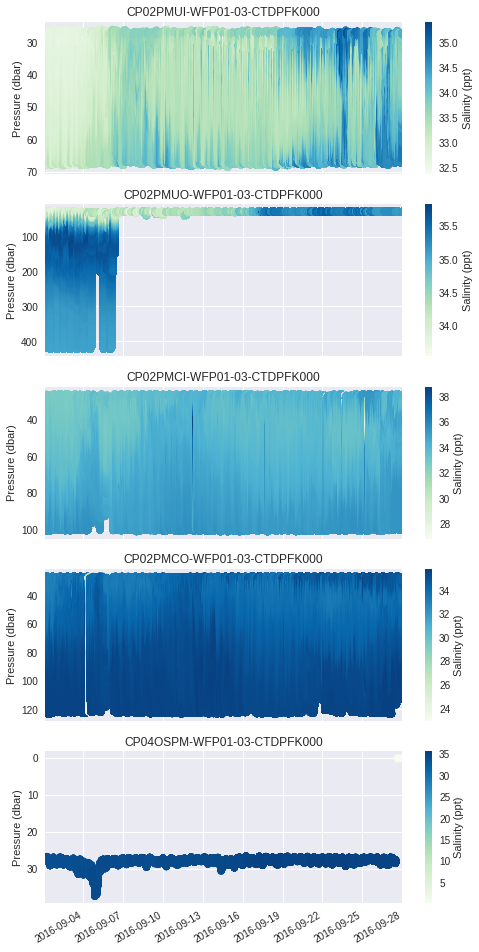

In [112]:
# Scatterplot of Salinity from 5 sites using the dictionary
fig,axes = plt.subplots(nrows=5, ncols=1, sharex=True, figsize=(8,18))
  
for i, ax in enumerate(axes.flat): 
  print i
  rd=refdes_list[i]
  t=data_dict[rd]['time']
  p=data_dict[rd]['pressure']
  sal=data_dict[rd]['salinity']
  
  sc = ax.scatter(t, p, c=sal, cmap='GnBu')
  ax.invert_yaxis() # Invert y axis
  ax.set_xlim(t[0],t[-1]) # Set the time limits to match the dataset
  cbar = fig.colorbar(sc, ax=ax, orientation='vertical')
  cbar.ax.set_ylabel('Salinity (ppt)')
  ax.set_ylabel('Pressure (dbar)')
  ax.set_title(rd)
  fig.autofmt_xdate() #rotates dates 45 degrees

0
1
2
3
4


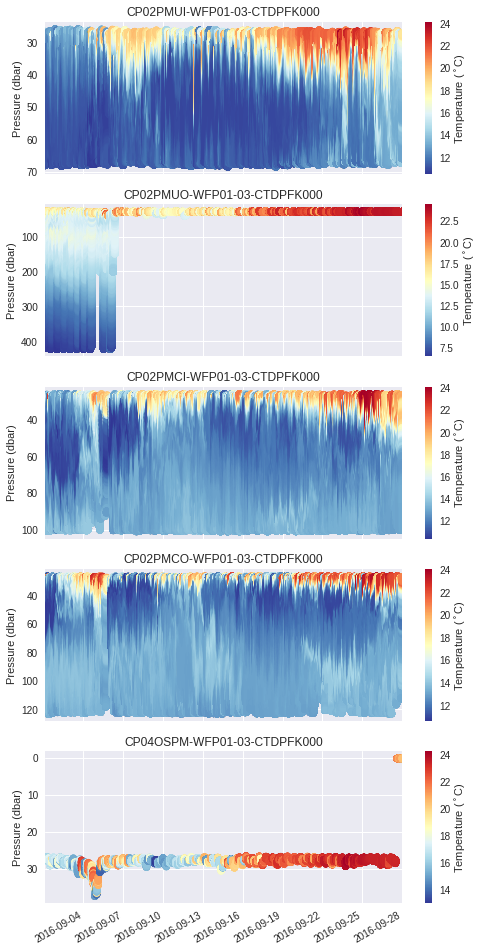

In [76]:
# Scatterplot of Temperature from 5 sites using the dictionary
fig,axes = plt.subplots(nrows=5, ncols=1, sharex=True, figsize=(8,18))
  
for i, ax in enumerate(axes.flat): 
  print i
  rd=refdes_list[i]
  t=data_dict[rd]['time']
  p=data_dict[rd]['pressure']
  temp=data_dict[rd]['temperature']
  
  sc = ax.scatter(t, p, c=temp, cmap='RdYlBu_r')
  ax.invert_yaxis() # Invert y axis
  ax.set_xlim(t[0],t[-1]) # Set the time limits to match the dataset
  cbar = fig.colorbar(sc, ax=ax, orientation='vertical')
  cbar.ax.set_ylabel('Temperature ($^\circ$C)')
  ax.set_ylabel('Pressure (dbar)')
  ax.set_title(rd)
  fig.autofmt_xdate() #rotates dates 45 degrees

## 5. Closer look at CP04OSPM-WFP01-03-CTDPFK000

To identify when the instrument stopped producing usable data, we grabbed and plotted more of the  data.

In [144]:
# Setup Instrument Variables for mooring
site = 'CP04OSPM'
node = 'WFP01' #We are using the wire-following profilers 
sensor = '03-CTDPFK000' # Evaluating the CTD
method = 'recovered_wfp' # Recovered data
stream = 'ctdpf_ckl_wfp_instrument_recovered' # CTD data 
beginDT = '2010-04-01T01:01:01.900Z' 
endDT = '2016-10-12T01:01:01.900Z'

# Specify some functions to convert timestamps
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def ntp_seconds_to_datetime(ntp_seconds):
    return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)
  
def convert_time(ms):
  if ms != None:
    return datetime.datetime.utcfromtimestamp(ms/1000)
  else:
    return None

In [145]:
# Setup Instrument Variables CP04OSPM-WFP01-03-CTDPFK000
params = {
  'beginDT': '2010-01-01T01:01:01.900Z',
  'endDT': '2016-10-12T01:01:01.900Z',
  'format':'application/netcdf',
  'include_provenance':'true',
  'include_annotations':'true'
}

#This loop only needs to run once. Uncomment to run.
# dfURL = []

# for site in sites:
#   data_request_url ='/'.join((DATA_API,site,node,sensor,method,stream))
#   r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
#   data = r.json()
#   dfURL.append(data['allURLs'][0])
  
print dfURL  

[u'https://opendap.oceanobservatories.org/thredds/catalog/ooi/justine.m.whitaker@gmail.com/20180621T212524-CP02PMUI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/catalog.html', u'https://opendap.oceanobservatories.org/thredds/catalog/ooi/justine.m.whitaker@gmail.com/20180621T212530-CP02PMUO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/catalog.html', u'https://opendap.oceanobservatories.org/thredds/catalog/ooi/justine.m.whitaker@gmail.com/20180621T212536-CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/catalog.html', u'https://opendap.oceanobservatories.org/thredds/catalog/ooi/justine.m.whitaker@gmail.com/20180621T212547-CP02PMCO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/catalog.html', u'https://opendap.oceanobservatories.org/thredds/catalog/ooi/justine.m.whitaker@gmail.com/20180621T212554-CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/catalog.html']


In [146]:
print(data['allURLs'][0])

https://opendap.oceanobservatories.org/thredds/catalog/ooi/justine.m.whitaker@gmail.com/20180621T212554-CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/catalog.html


In [0]:
%%time #check on request
check_complete = data['allURLs'][1] + '/status.txt'
for i in range(1000): 
    r = requests.get(check_complete)
    if r.status_code == requests.codes.ok:
        print('request completed')
        break
    else:
        time.sleep(1)

In [10]:
# Load the data files
dat = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/justine.m.whitaker@gmail.com/20180621T212554-CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0005_CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20160520T000003-20160928T121308.987146.nc'
ds1 = xr.open_dataset(dat)

In [0]:
# By default, OOI datasets use the 'obs' variable as the index, but time is more convenient
ds1 = ds1.swap_dims({'obs': 'time'})

# Sort the data
ds1 = ds1.sortby('time'); 

# # # Optional, this is used to optimize data processing
# ds1 = ds1.chunk({'time': 100}) 

ds1

In [12]:
temp_sub = ds1['ctdpf_ckl_seawater_temperature'].values
press_sub = ds1['ctdpf_ckl_seawater_pressure'].values
sal_sub = ds1['practical_salinity'].values
time_sub = ds1['time'].values
 

Deployment 1

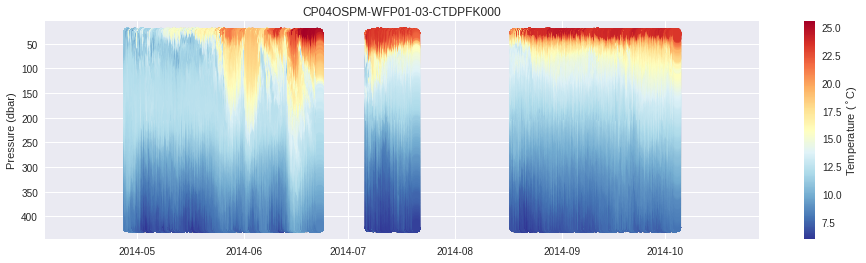

In [163]:
# fig,ax1 = plt.subplots(1,1,figsize=(16,4))
# sc1 = ax1.scatter(time_sub, press_sub, c=temp_sub, cmap='RdYlBu_r') # Add s=2 to set the markersize
# ax1.invert_yaxis() # Invert y axis
# #ax1.set_xlim(time_sub[0],time_sub[-1]) # Set the time limits to match the dataset
# cbar = fig.colorbar(sc1, ax=ax1, orientation='vertical')
# cbar.ax.set_ylabel('Temperature ($^\circ$C)')
# ax1.set_ylabel('Pressure (dbar)')
# ax1.set_title('CP04OSPM-WFP01-03-CTDPFK000');

Deployment 4

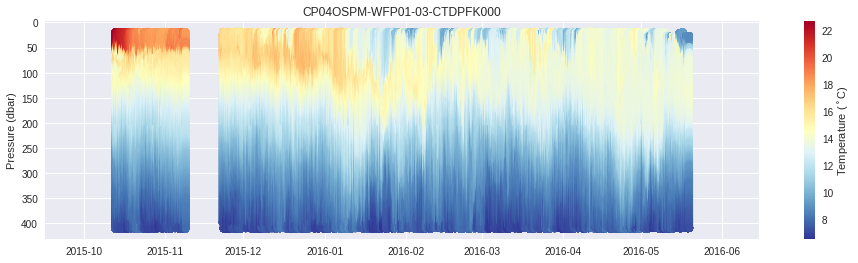

In [171]:
# fig,ax1 = plt.subplots(1,1,figsize=(16,4))
# sc1 = ax1.scatter(time_sub, press_sub, c=temp_sub, cmap='RdYlBu_r') # Add s=2 to set the markersize
# ax1.invert_yaxis() # Invert y axis
# #ax1.set_xlim(time_sub[0],time_sub[-1]) # Set the time limits to match the dataset
# cbar = fig.colorbar(sc1, ax=ax1, orientation='vertical')
# cbar.ax.set_ylabel('Temperature ($^\circ$C)')
# ax1.set_ylabel('Pressure (dbar)')
# ax1.set_title('CP04OSPM-WFP01-03-CTDPFK000');

Deployment 6

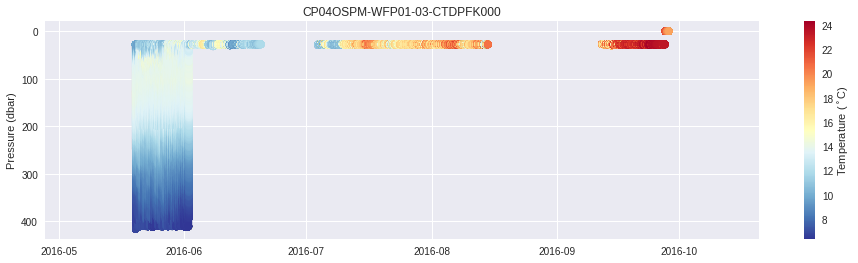

In [13]:
# fig,ax1 = plt.subplots(1,1,figsize=(16,4))
# sc1 = ax1.scatter(time_sub, press_sub, c=temp_sub, cmap='RdYlBu_r') # Add s=2 to set the markersize
# ax1.invert_yaxis() # Invert y axis
# #ax1.set_xlim(time_sub[0],time_sub[-1]) # Set the time limits to match the dataset
# cbar = fig.colorbar(sc1, ax=ax1, orientation='vertical')
# cbar.ax.set_ylabel('Temperature ($^\circ$C)')
# ax1.set_ylabel('Pressure (dbar)')
# ax1.set_title('CP04OSPM-WFP01-03-CTDPFK000');

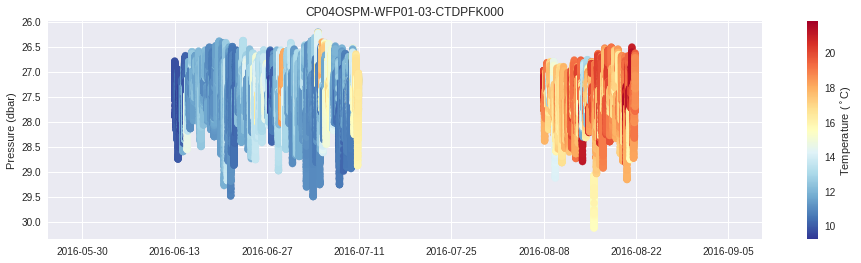

In [139]:
# Scatterplot of Temperature
# fig,ax1 = plt.subplots(1,1,figsize=(16,4))
# sc1 = ax1.scatter(time_sub, press_sub, c=temp_sub, cmap='RdYlBu_r') # Add s=2 to set the markersize
# ax1.invert_yaxis() # Invert y axis
# #ax1.set_xlim(time_sub[0],time_sub[-1]) # Set the time limits to match the dataset
# cbar = fig.colorbar(sc1, ax=ax1, orientation='vertical')
# cbar.ax.set_ylabel('Temperature ($^\circ$C)')
# ax1.set_ylabel('Pressure (dbar)')
# ax1.set_title('CP04OSPM-WFP01-03-CTDPFK000');

## 5. Notable Results and Actions Needed



For the month of September 2016, we make the following collusions regarding CTD (temperature, salinity and pressure) data. Overall, the available data seems to align with known physical processes, though additional datasets would need to be consulted to confirm. The persistent warm/salty surfaces that persist in the fall may be related to an offshore Gulf Stream filament. The data from these CTDs could be further evaluated by incorporating additional instruments from the Pioneer array. Data gaps could be filled in and cross-validation could be performed by using other systems, including the glider dataset for the Pioneer array or the Argo buoy dataset. Specifically, CP04OSPM-WFP01-03-CTDPFK000 should be investigated further. 


**CP02PMUI-WFP01-03-CTDPFK000**
The data for this instrument are reasonable. Temperature plot shows a defined thermocline and heterogeneous salinity.

**CP02PMUO-WFP01-03-CTDPFK000**	
An annotation was provided for CP02PMUO-WFP01-03-CTDPFK000 which stated that the wire-following profiler was stuck. There is no usable data from this instrument.

**CP02PMCI-WFP01-03-CTDPFK000**	
The data for this instrument are reasonable. Temperature plot shows a defined thermocline, but the salinity shows mixing.


**CP02PMCO-WFP01-03-CTDPFK000**
The data for this instrument are reasonable. Temperature plot shows a defined thermocline, but the salinity shows mixing.


**CP04OSPM-WFP01-03-CTDPFK000**
There was an annotation provided stating that the profiler was stuck. All data were downloaded and plotted to resolve when this profiler may have become stuck and identify further data gaps. Our plots show that it was stuck between 25-30 m for all deployments. There were no annotations for the multiple time periods when no data were collected at all, but it doesn't really matter since the profiler was stuck.
